In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'DateTime': ['Date', 'Time']})
df.head()

C:\Users\alan0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.set_index('DateTime', inplace=True)

In [4]:
df.replace('?',np.NaN, inplace=True)

In [5]:
df.Global_active_power = df.Global_active_power.astype(np.float16)
df.Global_reactive_power = df.Global_reactive_power.astype(np.float16)
df.Voltage = df.Voltage.astype(np.float16)
df.Global_intensity = df.Global_intensity.astype(np.float16)
df.Sub_metering_1 = df.Sub_metering_1.astype(np.float16)
df.Sub_metering_2 = df.Sub_metering_2.astype(np.float16)
df.Sub_metering_3 = df.Sub_metering_3.astype(np.float16)

<AxesSubplot:>

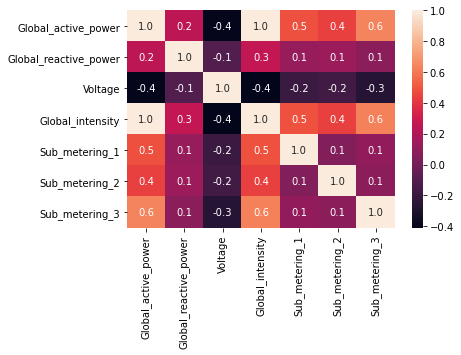

In [15]:
seaborn.heatmap(df.corr(), fmt='0.1f', annot=True)

In [14]:
df.Global_intensity.replace('nan',df.Global_intensity.median())

DateTime
2006-12-16 17:24:00    18.406250
2006-12-16 17:25:00    23.000000
2006-12-16 17:26:00    23.000000
2006-12-16 17:27:00    23.000000
2006-12-16 17:28:00    15.796875
                         ...    
2010-11-26 20:58:00     4.000000
2010-11-26 20:59:00     4.000000
2010-11-26 21:00:00     3.800781
2010-11-26 21:01:00     3.800781
2010-11-26 21:02:00     3.800781
Name: Global_intensity, Length: 2049280, dtype: float16

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [19]:
# dupli = df.drop(columns=df['Global_intensity'], axis=1)

KeyError: '[18.40625 23.0 23.0 ... 3.80078125 3.80078125 3.80078125] not found in axis'

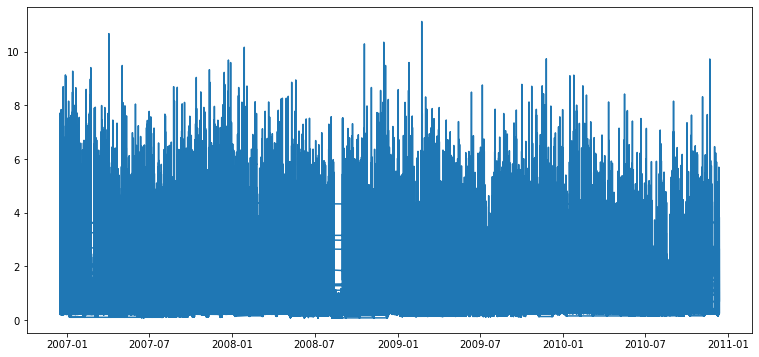

In [7]:
ts = df['Global_active_power']
plt.figure(figsize=(13,6))
plt.plot(ts)

In [8]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(ts):
    
    rolmean = ts.rolling(1440).mean()
    rolstd = ts.rolling(1440).std()
    
    # Plot rolling statistics
    original = plt.plot(ts, c='yellow', label='Original')
    mean = plt.plot(ts, c='red', label='Rolling Mean')
    std = plt.plot(ts, c='blue', label='Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)

    # Performing Dick-Fuller test
    print('Results of Dick-Fuller test: ')
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', '#Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s) : ' % key] = value
    print(dfoutput)

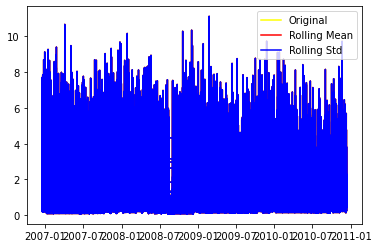

Results of Dick-Fuller test: 


MemoryError: Unable to allocate 2.21 GiB for an array with shape (2049423, 145) and data type float64

In [12]:
stationarity_test(ts)

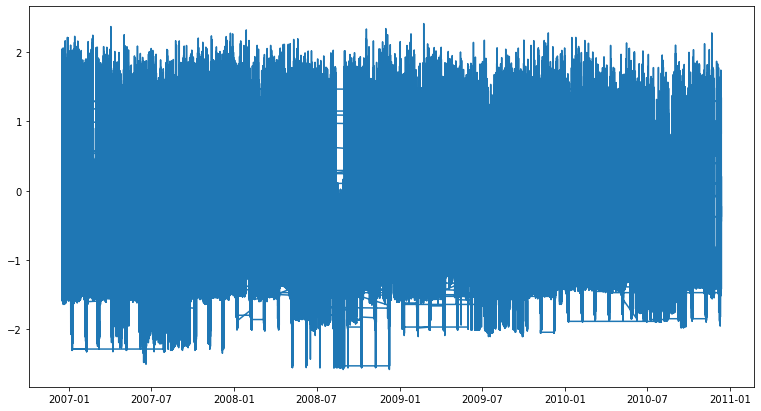

In [13]:
ts_log = np.log(ts)
plt.figure(figsize=(13,7))
plt.plot(ts_log)

In [14]:
moving_avg = ts_log.rolling(1440).mean()
plt.figure(figsize=(13,7))
plt.plot(ts_log)
plt.plot(moving_avg, c='red')

MemoryError: In draw_path: Out of memory

<Figure size 936x504 with 1 Axes>